In [0]:
import pandas as pd
from sklearn.utils import shuffle


In [0]:
data=pd.read_csv("train.csv")#Making it Relative Path -Mayank

In [0]:
data.head()
data=shuffle(data)
#data=data[0:8000]

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 1054 to 5044
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [0]:
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline

In [217]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [218]:
data.shape

(10886, 12)

In [0]:
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

In [0]:
data['year'] = data['datetime'].dt.year 
#data['month'] = data['datetime'].dt.month 
data['day'] = data['datetime'].dt.day 
data['hour'] = data['datetime'].dt.hour 


In [221]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
1054,2011-03-08 11:00:00,1,0,1,2,14.76,17.425,25,11.0014,26,52,78,2011,8,11
455,2011-02-02 01:00:00,1,0,1,3,9.02,11.365,93,12.9980,0,3,3,2011,2,1
3525,2011-08-16 19:00:00,3,0,1,1,30.34,33.335,48,12.9980,56,320,376,2011,16,19
9566,2012-10-02 23:00:00,4,0,1,2,25.42,27.275,94,0.0000,11,87,98,2012,2,23
1757,2011-04-19 03:00:00,2,0,1,1,19.68,23.485,63,15.0013,0,3,3,2011,19,3


In [0]:
data=data.drop('datetime',axis=1)

In [0]:
def normalize(df,columns):
    result=df.copy()
    for feature_name in columns :
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / std_value
        
    return result

In [0]:
data=normalize(data,["temp","atemp","humidity","windspeed"])


In [0]:



def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data



In [0]:


data = dummy_data(data, ["season","weather","hour"])


In [227]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
1054,0,1,-0.702149,-0.735148,-1.916674,-0.220220,26,52,78,2011,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
455,0,1,-1.438841,-1.450226,1.616705,0.024325,0,3,3,2011,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3525,0,1,1.297443,1.142227,-0.721561,0.024325,56,320,376,2011,16,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9566,0,1,0.665992,0.427149,1.668666,-1.567682,11,87,98,2012,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1757,0,1,-0.070699,-0.020070,0.057861,0.269691,0,3,3,2011,19,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import seaborn as sns

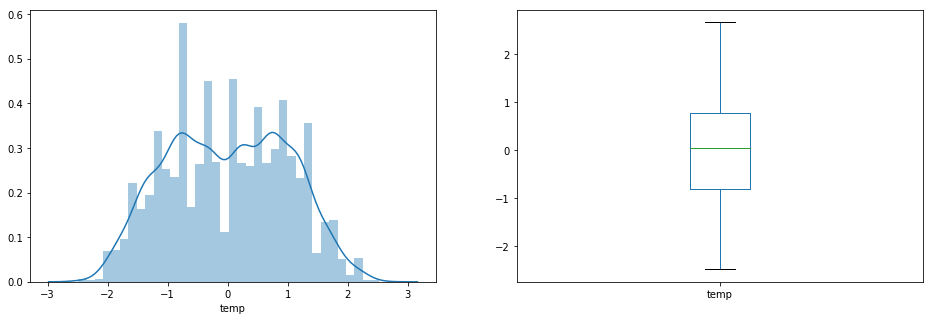

In [229]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['temp']); 
plt.subplot(122)
data['temp'].plot.box(figsize=(16,5)) 
plt.show()

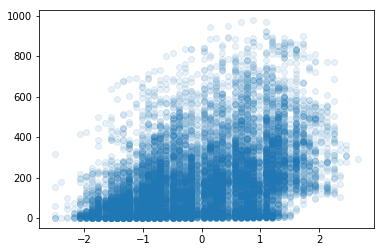

In [230]:
plt.scatter(data['temp'],data['count'],alpha=0.1,
            cmap='viridis')

In [231]:
data['temp'].describe()

count    1.088600e+04
mean    -3.321470e-15
std      1.000000e+00
min     -2.491258e+00
25%     -8.073910e-01
50%      3.454240e-02
75%      7.712342e-01
max      2.665584e+00
Name: temp, dtype: float64

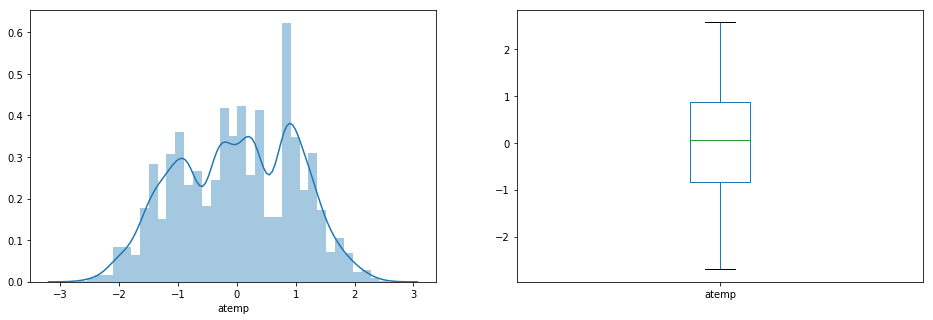

In [232]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['atemp']); 
plt.subplot(122)
data['atemp'].plot.box(figsize=(16,5)) 
plt.show()

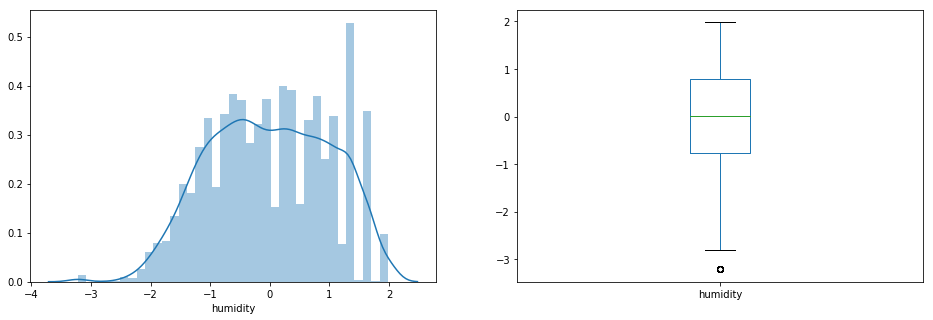

In [233]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['humidity']); 
plt.subplot(122)
data['humidity'].plot.box(figsize=(16,5)) 
plt.show()

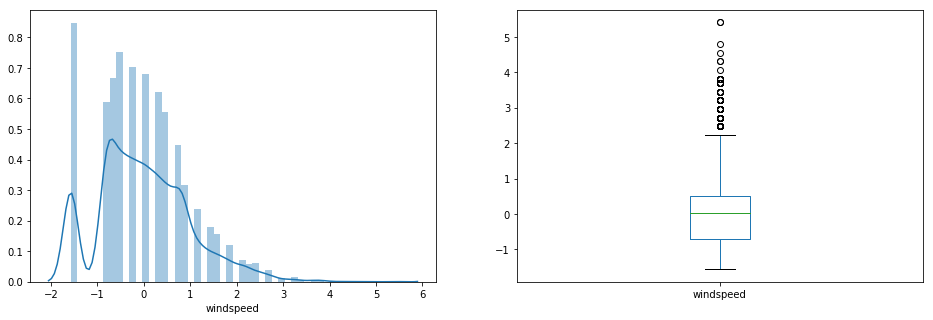

In [140]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['windspeed']); 
plt.subplot(122)
data['windspeed'].plot.box(figsize=(16,5)) 
plt.show()

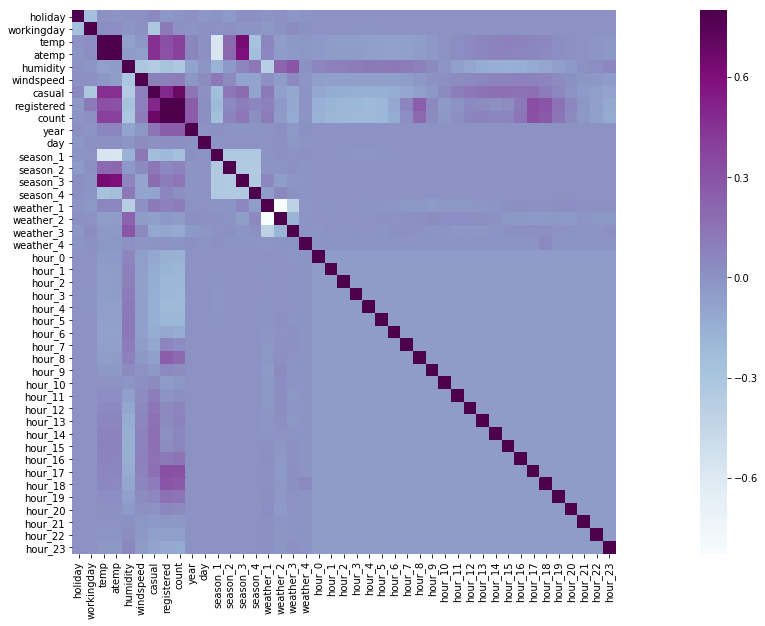

In [234]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [0]:
import numpy as np

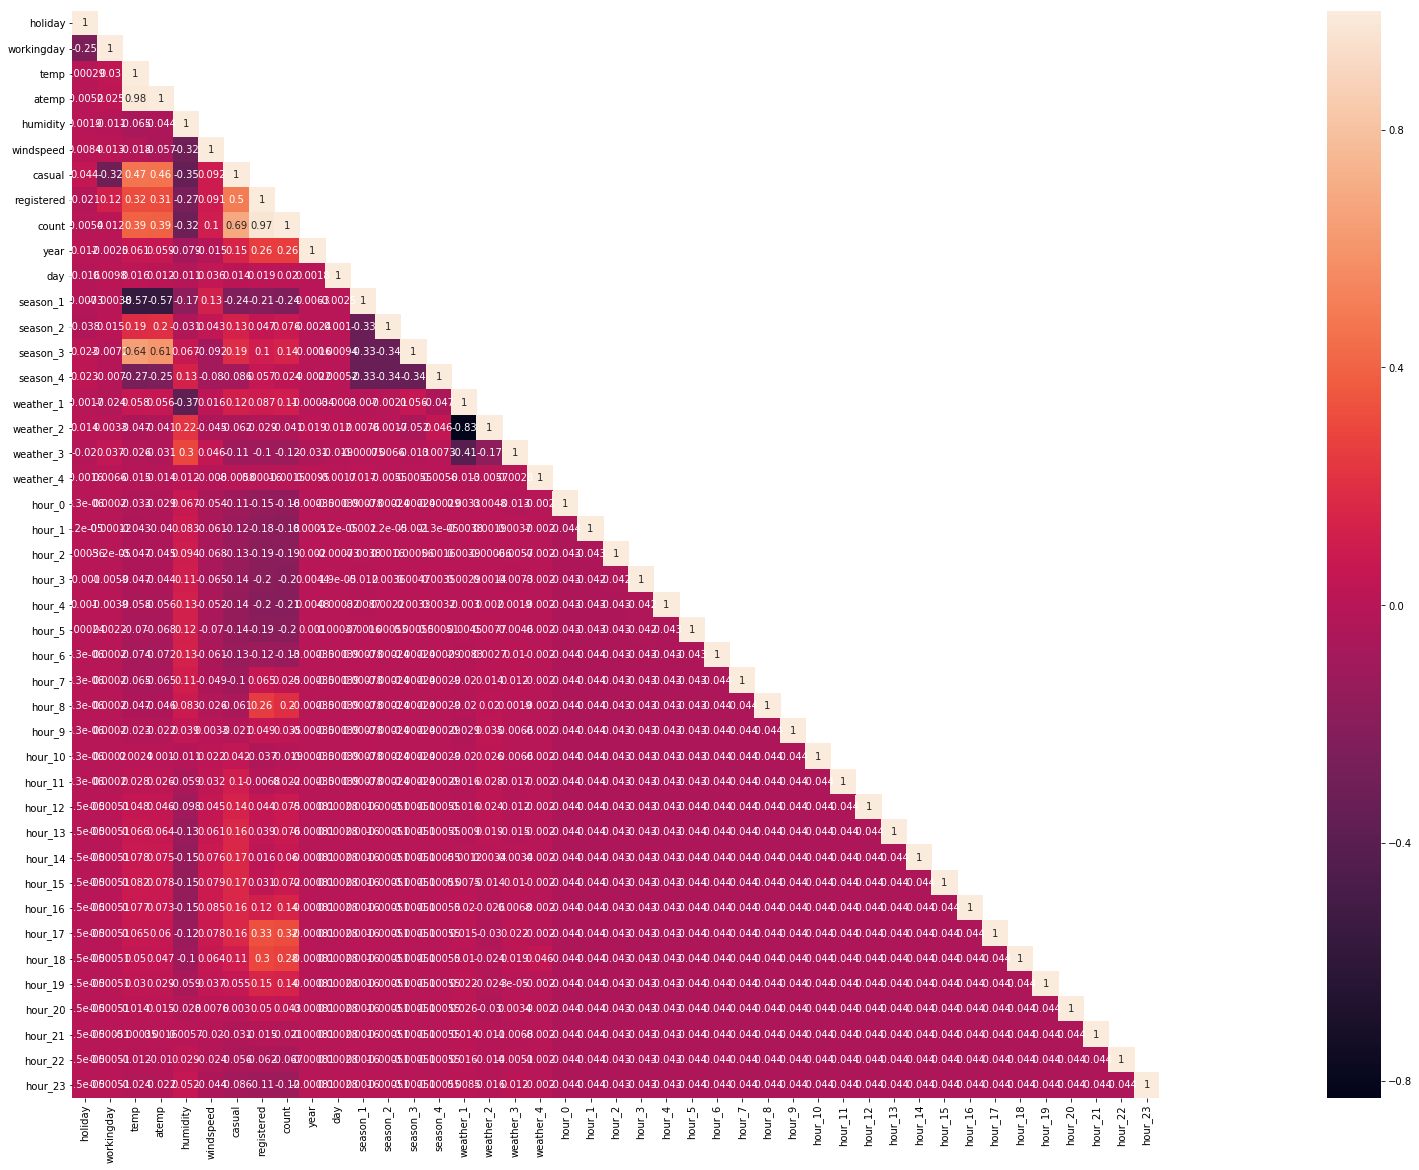

In [236]:
corrMat = data.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(60, 20))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

In [237]:
data.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,-0.015877,-0.007336,-0.038250,0.022790,0.022751,-0.001708,0.013868,-0.019514,-0.001644,0.000003,0.000082,0.000558,-0.001045,0.001041,0.000240,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,0.009829,-0.000379,0.014620,-0.007194,-0.007048,-0.024078,0.003324,0.036643,0.006562,0.000199,-0.000115,-0.000032,-0.005867,-0.003941,0.002217,0.000199,0.000199,0.000199,0.000199,0.000199,0.000199,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.015551,-0.565655,0.192661,0.635975,-0.266220,0.058430,-0.046925,-0.025715,-0.014800,-0.032641,-0.042606,-0.047208,-0.046941,-0.057946,-0.070012,-0.073705,-0.065492,-0.047424,-0.023366,0.002384,0.027650,0.047520,0.066003,0.078261,0.081880,0.077489,0.065038,0.050367,0.030436,0.013931,-0.000354,-0.012467,-0.023808
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.011866,-0.569082,0.204421,0.607090,-0.245690,0.055825,-0.040792,-0.031154,-0.013901,-0.029390,-0.040462,-0.044799,-0.044218,-0.055892,-0.068109,-0.072270,-0.064558,-0.045680,-0.022249,0.001015,0.026005,0.045564,0.064008,0.075487,0.078396,0.073191,0.060075,0.047119,0.029169,0.015231,0.001621,-0.010430,-0.021702
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,-0.011335,-0.166208,-0.031095,0.067308,0.129018,-0.374837,0.222398,0.295894,0.012010,0.067208,0.083417,0.094050,0.110064,0.125649,0.124625,0.130751,0.112933,0.083213,0.038776,-0.011243,-0.059401,-0.097722,-0.128435,-0.146758,-0.150047,-0.145353,-0.124575,-0.100366,-0.059264,-0.027645,0.005666,0.029136,0.051748
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,0.036157,0.128819,0.042991,-0.091521,-0.079535,0.015920,-0.045016,0.045597,-0.007979,-0.053666,-0.060829,-0.067857,-0.065464,-0.052457,-0.069776,-0.060526,-0.049120,-0.025895,0.003341,0.021836,0.031735,0.045248,0.061366,0.076080,0.079278,0.085403,0.077874,0.063611,0.036765,0.007613,-0.019514,-0.024450,-0.044105
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.014109,-0.235222,0.132405,0.187726,-0.086258,0.119728,-0.062184,-0.108853,-0.005760,-0.107482,-0.123222,-0.129395,-0.135829,-0.143135,-0.144009,-0.133245,-0.104965,-0.060531,-0.021178,0.042210,0.100463,0.137319,0.159200,0.169792,0.167442,0.163486,0.164982,0.106204,0.054630,0.002974,-0.031198,-0.056163,-0.086048
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.019111,-0.207278,0.046969,0.102142,0.056961,0.086621,-0.028997,-0.104936,0.000155,-0.153117,-0.177086,-0.188571,-0.197388,-0.204870,-0.189128,-0.115388,0.064510,0.256759,0.048776,-0.036754,-0.006818,0.044475,0.039008,0.015645,0.031451,0.118697,0.329179,0.296144,0.153190,0.050162,-0.014882,-0.061716,-0.112840
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.019826,-0.237704,0.075681,0.136942,0.023704,0.105246,-0.041329,-0.117519,-0.001459,-0.157313,-0.181640,-0.192919,-0.202045,-0.210298,-0.197414,-0.132961,0.024839,0.197392,0.034828,-0.019004,0.022023,0.074957,0.076433,0.059874,0.072405,0.1440

In [238]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
1054,0,1,-0.702149,-0.735148,-1.916674,-0.220220,26,52,78,2011,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
455,0,1,-1.438841,-1.450226,1.616705,0.024325,0,3,3,2011,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3525,0,1,1.297443,1.142227,-0.721561,0.024325,56,320,376,2011,16,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9566,0,1,0.665992,0.427149,1.668666,-1.567682,11,87,98,2012,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1757,0,1,-0.070699,-0.020070,0.057861,0.269691,0,3,3,2011,19,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:

def split_valid_test_data(data, fraction=0.2):
    data_y = data["count"]
    
    

    data_x = data.drop(["count","casual","registered"], axis=1)

    

    return data_x.values, data_y

data_x, data_y = split_valid_test_data(data)
#test_x,test_y=split_valid_test_data(test)

In [240]:
data_x.shape

(10886, 40)

In [241]:
data.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'day', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import Adam,SGD,RMSprop,Adagrad

In [0]:

  
#adam = Adam(lr=1e-3, decay=1e-3 / 200)
 
#sgd=SGD(lr=1e-3, decay=1e-3 / 200, momentum=0.9, nesterov=True)
    
#rms=RMSprop(lr=1e-3)
  
ada=Adagrad(lr=1e-3)
  
  
    
   

In [270]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = data_x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='softplus'))

# Compile the network :
NN_model.compile(loss='mean_squared_logarithmic_error', optimizer=ada, metrics=['mean_absolute_error','mean_squared_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_82 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_83 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_84 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 257       
Total params: 170,113
Trainable params: 170,113
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose =1, save_best_only = True, mode ='auto')
early_stop=EarlyStopping(monitor='val_loss',patience=10)
callbacks_list = [checkpoint,early_stop]

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
 
 
  plt.legend()
  plt.show()

In [272]:
history=NN_model.fit(data_x, data_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 8708 samples, validate on 2178 samples
Epoch 1/100
8708/8708 [==============================] - 2s 205us/step - loss: 2.0666 - mean_absolute_error: 145.3382 - mean_squared_error: 43122.3625 - val_loss: 1.9846 - val_mean_absolute_error: 140.5411 - val_mean_squared_error: 40405.6950

Epoch 00001: val_loss improved from inf to 1.98458, saving model to Weights-001--1.98458.hdf5
Epoch 2/100
8708/8708 [==============================] - 1s 111us/step - loss: 2.0225 - mean_absolute_error: 144.3020 - mean_squared_error: 42408.0464 - val_loss: 1.9810 - val_mean_absolute_error: 138.2159 - val_mean_squared_error: 38614.6766

Epoch 00002: val_loss improved from 1.98458 to 1.98097, saving model to Weights-002--1.98097.hdf5
Epoch 3/100
8708/8708 [==============================] - 1s 110us/step - loss: 2.0210 - mean_absolute_error: 143.8247 - mean_squared_error: 42034.6883 - val_loss: 1.9810 - val_mean_absolute_error: 139.9838 - val_mean_squared_error: 39997.7114

Epoch 00003: val_loss did no

In [251]:
data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [0]:
test=pd.read_csv("test.csv")
test_original=test.copy()

In [254]:
test.shape

(6493, 9)

In [255]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [0]:
test['datetime'] = pd.to_datetime(test['datetime'], errors='coerce')

In [0]:
test['year'] = test['datetime'].dt.year 
#test['month'] = test['datetime'].dt.month 
test['day'] = test['datetime'].dt.day 
test['hour'] = test['datetime'].dt.hour

In [0]:
test=test.drop('datetime',axis=1)

In [0]:
test=normalize(test,["temp","atemp","humidity","windspeed"])

In [0]:
test = dummy_data(test, ["season","weather","hour"])

In [261]:
test.shape

(6493, 40)

In [262]:
test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'day', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [0]:
#making predictions
prediction = NN_model.predict(test)

In [0]:
#prediction=pd.DataFrame(prediction)

#prediction=prediction.clip(lower=0)
#prediction

In [264]:
prediction.shape

(6493, 1)

In [273]:
prediction

array([[12.484183 ],
       [ 5.482817 ],
       [ 3.3542812],
       ...,
       [86.02271  ],
       [67.707184 ],
       [43.065197 ]], dtype=float32)

In [265]:

evaluation=test_original['datetime'].to_frame()
evaluation["count"]=prediction
evaluation[:10]

,datetime,count
0,2011-01-20 00:00:00,12.484183
1,2011-01-20 01:00:00,5.482817
2,2011-01-20 02:00:00,3.354281
3,2011-01-20 03:00:00,2.179120
4,2011-01-20 04:00:00,2.121344
5,2011-01-20 05:00:00,10.160122
6,2011-01-20 06:00:00,55.021420
7,2011-01-20 07:00:00,150.138443
8,2011-01-20 08:00:00,280.271149
9,2011-01-20 09:00:00,132.132675


In [0]:
evaluation["count"] = evaluation["count"].astype(int)
evaluation["count"]

0        14
1         7
2         4
3         2
4         2
5        13
6        47
7       152
8       262
9       136
10       69
11       74
12      107
13       86
14       79
15       84
16      119
17      259
18      203
19      141
20       91
21       68
22       49
23       32
24       12
25        5
26        3
27        2
28        2
29       12
       ... 
6463     99
6464    115
6465     59
6466     51
6467     38
6468     29
6469     13
6470      6
6471      3
6472      2
6473      2
6474     12
6475     45
6476    133
6477    223
6478    131
6479     61
6480     66
6481     80
6482     86
6483     78
6484     85
6485    110
6486    244
6487    222
6488    145
6489    103
6490     90
6491     73
6492     42
Name: count, Length: 6493, dtype: int64

In [0]:
evaluation.to_csv("submissionv19.csv",index=False)